In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
import seaborn as sns

# Quadrant Association Function

This function takes as input two coordinates and calculates their strentgh of association with each of the four quadrants. The formula is below. Note that in the paper we consider the time T -- this function consider that it already received an appropriate input, i.e., the z-scores from the given time period T.

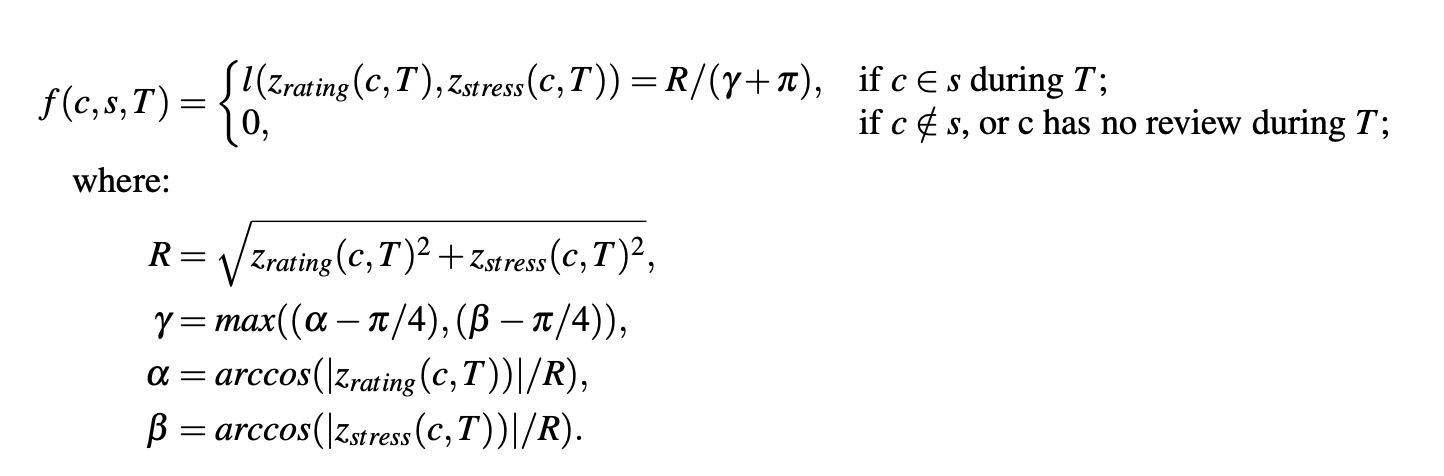



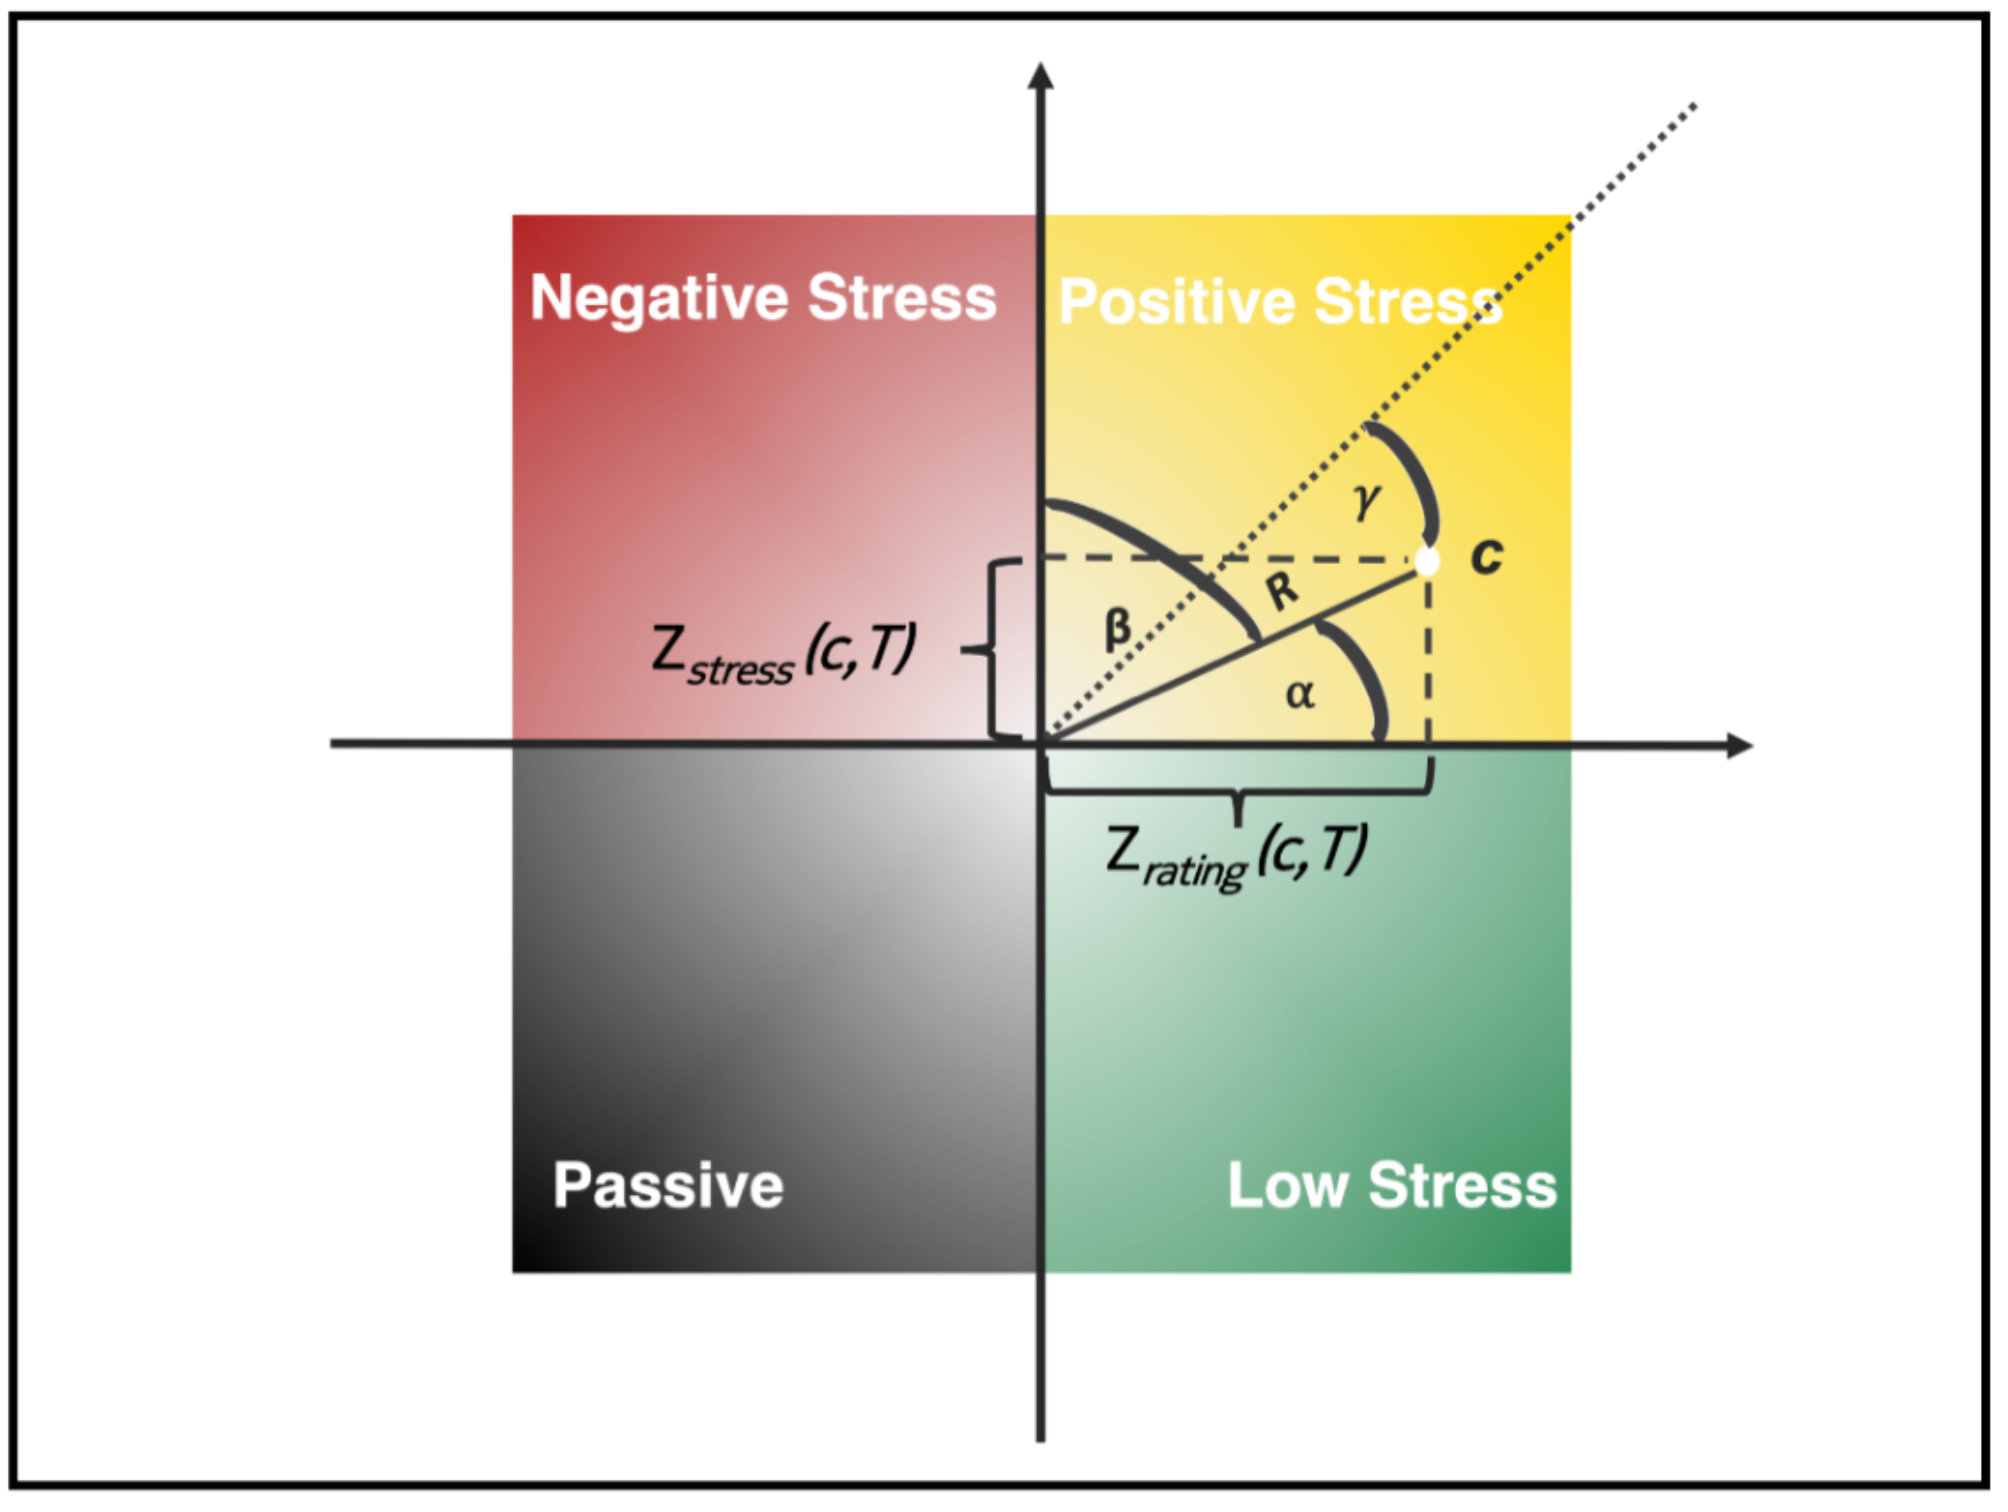

## The function f

In [2]:
def f(x,y):
    x = x.astype(float)
    y = y.astype(float)
    L = np.sqrt((x)**2+(y)**2)
    cos_alpha = np.abs(x) / L
    cos_beta = np.abs(y) / L
    alpha = np.arccos(cos_alpha)
    beta = np.arccos(cos_beta)
    angle_centre = math.acos(math.pi/4.0) # fix for each quadrant
    angle_from_centre_x = np.array(np.abs(alpha - angle_centre))
    angle_from_centre_y = np.array((np.abs(beta - angle_centre)))
    angle_from_centre = np.fmax(angle_from_centre_x, angle_from_centre_y)
    
    res = L / (angle_from_centre + math.pi)
    res = (res - np.min(res)) / (np.max(res) - np.min(res))
    return res

## Visually display the function output

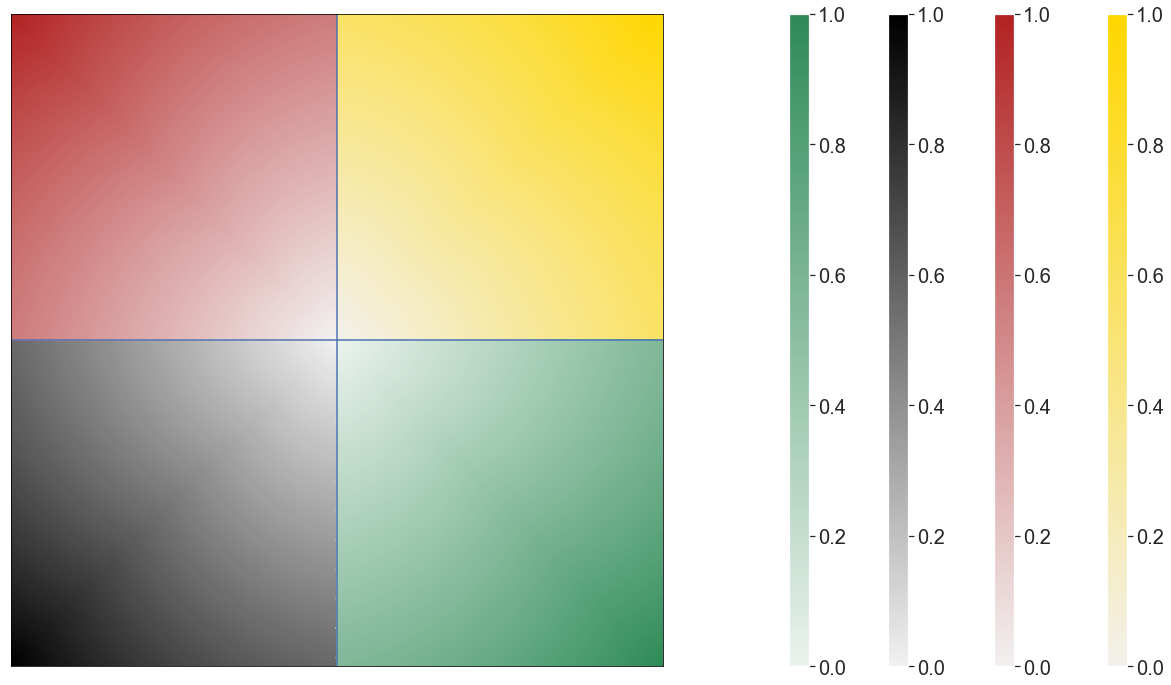

In [3]:
fig, ax = plt.subplots(figsize=(20,12))
sns.set(font_scale=4)
border = math.pi 
step = .01

xpos = np.arange(0.00001,border+step,step)
xneg = np.arange(- border,0.00001,step)
yneg = np.arange(0.00001,border+step,step)
ypos = np.arange(- border,0.00001,step)

plt.axvline(x=0.0)
plt.axhline(y=0.0)

ax.xaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.NullLocator())

plt.gca().invert_yaxis()


CMAP_Q_dict = {
    'Q1': sns.light_palette("seagreen", as_cmap=True),
    'Q2': sns.light_palette("black", as_cmap=True),
    'Q3': sns.light_palette("firebrick", as_cmap=True),
    'Q4': sns.light_palette("gold", as_cmap=True)
}


COLORS =  {"Q1":"seagreen",
           "Q2":"black",
           "Q3":"firebrick", 
           "Q4":"gold"}


# neg
X,Y = np.meshgrid(xneg, yneg)
Z =f(X,Y)
cmap = CMAP_Q_dict['Q2']
im = plt.pcolormesh(X,Y,Z, cmap=cmap,shading='auto')

# low stress / relaxed
X,Y = np.meshgrid(xpos, ypos)
Z =f(X,Y)
cmap = CMAP_Q_dict['Q4']
im = plt.pcolormesh(X,Y,Z, cmap=cmap, shading='auto')

# passive
X,Y = np.meshgrid(xneg, xneg)
Z =f(X,Y)
cmap = CMAP_Q_dict['Q3']
im = plt.pcolormesh(X,Y,Z, cmap=cmap, shading='auto')

# pos stress
X,Y = np.meshgrid(xpos, yneg)
Z =f(X,Y)
cmap = CMAP_Q_dict['Q1']
im = plt.pcolormesh(X,Y,Z, cmap=cmap, shading='auto')


# set an axis for the color bar
divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="3%", pad=1.75)
# color bar
mappable = plt.cm.ScalarMappable(cmap=CMAP_Q_dict['Q1']) # norm=plt.Normalize(vmin=MIN, vmax=MAX)
cbar = fig.colorbar(mappable, cax=cax, orientation="vertical")
cbar.ax.tick_params(labelsize=20)

cax = divider.append_axes("right", size="3%", pad=1.1)
# color bar
mappable = plt.cm.ScalarMappable(cmap=CMAP_Q_dict['Q2'])
cbar = fig.colorbar(mappable, cax=cax, orientation="vertical")
cbar.ax.tick_params(labelsize=20)

cax = divider.append_axes("right", size="3%", pad=1.2)
# color bar
mappable = plt.cm.ScalarMappable(cmap=CMAP_Q_dict['Q3'])
cbar = fig.colorbar(mappable, cax=cax, orientation="vertical")
cbar.ax.tick_params(labelsize=20)

cax = divider.append_axes("right", size="3%", pad=1.3)
# color bar
mappable = plt.cm.ScalarMappable(cmap=CMAP_Q_dict['Q4'])
cbar = fig.colorbar(mappable, cax=cax, orientation="vertical")
cbar.ax.tick_params(labelsize=20)

# plt.savefig("../results/fig/quadrants_score_map_colorbars.png", dpi=200)

plt.show()
